# Diffusion properties

## Import libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import os
import sys
sys.path.append("../")

from scipy import stats
from scipy.linalg import norm
from scipy.optimize import curve_fit

from config import results_folder, plots_folder

## Parameters

In [5]:
N = 2000
radius = 0.007

## Utility functions

In [54]:
def msd_function(t, v0, q, gamma):
    #v0 = 0.2
    return (v0**2-q/gamma)*(1-np.exp(-gamma*t))**2/gamma**2+2*q*t/gamma**2-2*q*(1-np.exp(-gamma*t))/gamma**3

## Mean quadratic displacement as a function of time

### Load data

In [3]:
mean_q_dist_matrix = np.load(file=os.path.join(results_folder, f"problem_6_N_{N}_mean_q_dist.npy"))
mean_q_dist_matrix_half_mask = np.load(file=os.path.join(results_folder, f"problem_6_N_{N}_mean_q_dist_half_mask.npy"))
mean_q_dist_matrix_double_mask = np.load(file=os.path.join(results_folder, f"problem_6_N_{N}_mean_q_dist_double_mask.npy"))

In [4]:
D = 7.88*1e-04
time_array = mean_q_dist_matrix[:, 2]
times = np.linspace(0, time_array[-1], 2)
avg_speed = 0.177
mfp = 0.01263

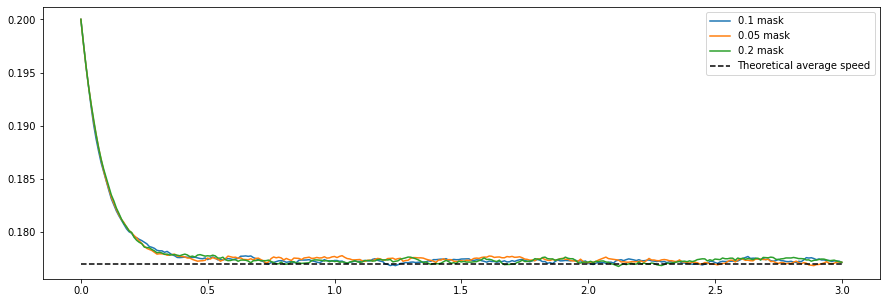

In [39]:
plt.figure(figsize=(15, 5))
plt.plot(time_array, mean_q_dist_matrix[:, 1], label='0.1 mask')
plt.plot(time_array, mean_q_dist_matrix_half_mask[:, 1], label='0.05 mask')
plt.plot(time_array, mean_q_dist_matrix_double_mask[:, 1], label='0.2 mask')
plt.plot([time_array[0], time_array[-1]], [avg_speed, avg_speed], 'k--', label='Theoretical average speed')
plt.legend()
plt.show()

In [40]:
slope, intercept, r_value, p_value, std_err = stats.linregress(time_array, mean_q_dist_matrix[:, 0])

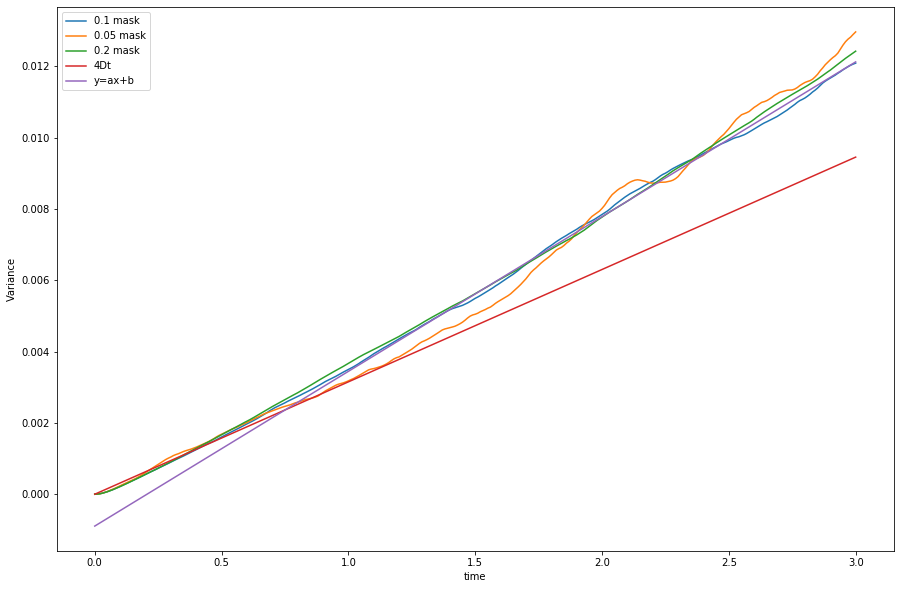

In [69]:
plt.figure(figsize=(15, 10))
plt.plot(time_array, mean_q_dist_matrix[:, 0], label='0.1 mask')
plt.plot(time_array, mean_q_dist_matrix_half_mask[:, 0], label='0.05 mask')
plt.plot(time_array, mean_q_dist_matrix_double_mask[:, 0], label='0.2 mask')
plt.plot(times, times*4*D, label='4Dt')
# plt.plot(times, 4*times*mfp*avg_speed/3, label='mfp')
plt.plot(times, times*slope+intercept, label='y=ax+b')
plt.xlabel('time')
plt.ylabel('Variance')
plt.legend()
plt.show()

In [63]:
x = time_array[100:200]
y = mean_q_dist_matrix[100:200, 0]

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [77]:
slope

0.00434034812472518

In [66]:
4*D

0.0031520000000000003

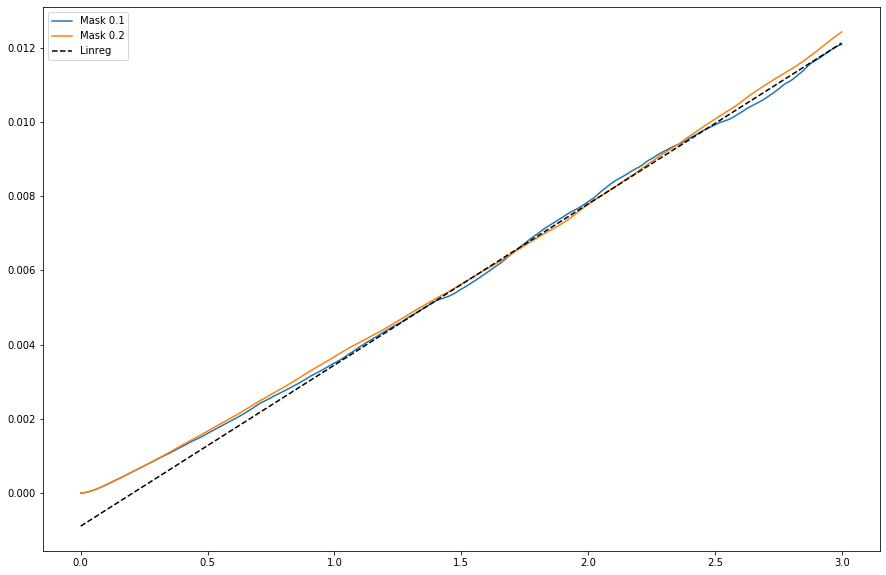

In [67]:
plt.figure(figsize=(15, 10))
plt.plot(time_array, mean_q_dist_matrix[:, 0], label='Mask 0.1')
plt.plot(time_array, mean_q_dist_matrix_double_mask[:, 0], label='Mask 0.2')
plt.plot(times, times*slope+intercept, 'k--', label='Linreg')
plt.legend()
plt.show()

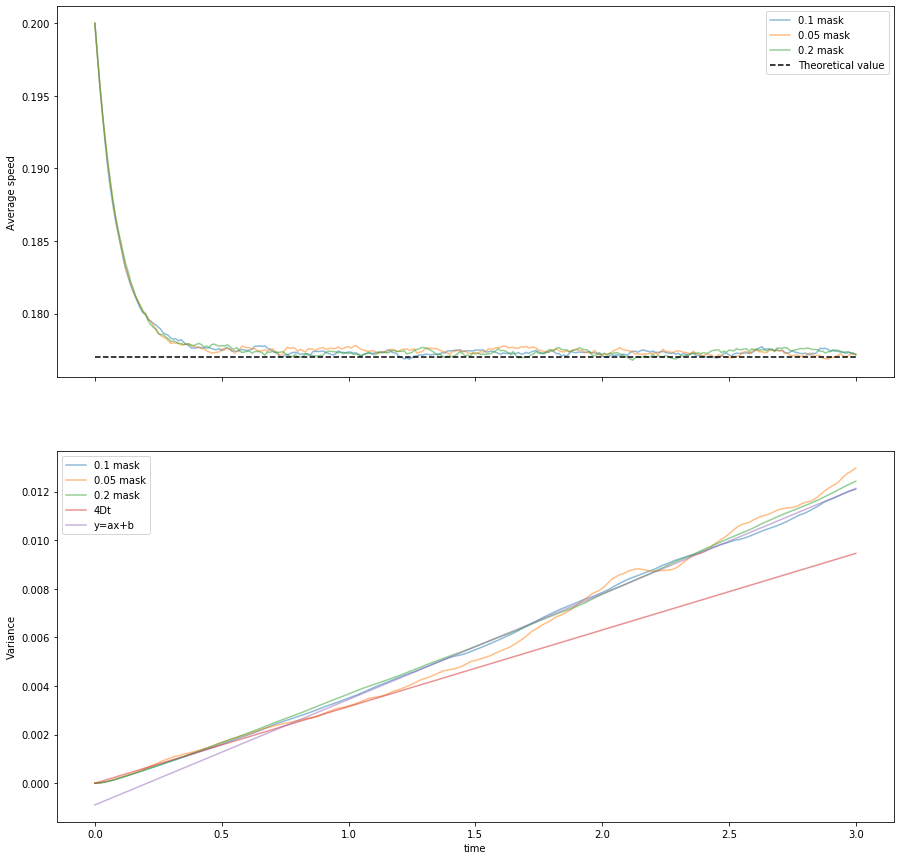

In [80]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(15,15))
axes[0].plot(time_array, mean_q_dist_matrix[:, 1], alpha=0.5, label='0.1 mask')
axes[0].plot(time_array, mean_q_dist_matrix_half_mask[:, 1], alpha=0.5, label='0.05 mask')
axes[0].plot(time_array, mean_q_dist_matrix_double_mask[:, 1], alpha=0.5, label='0.2 mask')
axes[0].plot([time_array[0], time_array[-1]], [avg_speed, avg_speed], 'k--', label='Theoretical value')
axes[0].legend()
axes[0].set_ylabel('Average speed')
axes[1].plot(time_array, mean_q_dist_matrix[:, 0], alpha=0.5, label='0.1 mask')
axes[1].plot(time_array, mean_q_dist_matrix_half_mask[:, 0], alpha=0.5, label='0.05 mask')
axes[1].plot(time_array, mean_q_dist_matrix_double_mask[:, 0], alpha=0.5, label='0.2 mask')
axes[1].plot(times, times*4*D, alpha=0.5, label='4Dt')
axes[1].plot(times, times*slope+intercept, alpha=0.5, label='y=ax+b')
axes[1].set_xlabel('time')
axes[1].set_ylabel('Variance')
axes[1].legend()
plt.savefig(os.path.join(plots_folder, f"variance_diff_masks.pdf"))
plt.show()

In [5]:
mean_q_dist_matrix = np.load(file=os.path.join(results_folder, f"problem_6_N_{N}_mean_q_dist_long_time.npy"))

In [6]:
time_array = mean_q_dist_matrix[:, 2]
x = time_array
y = mean_q_dist_matrix[:, 0]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

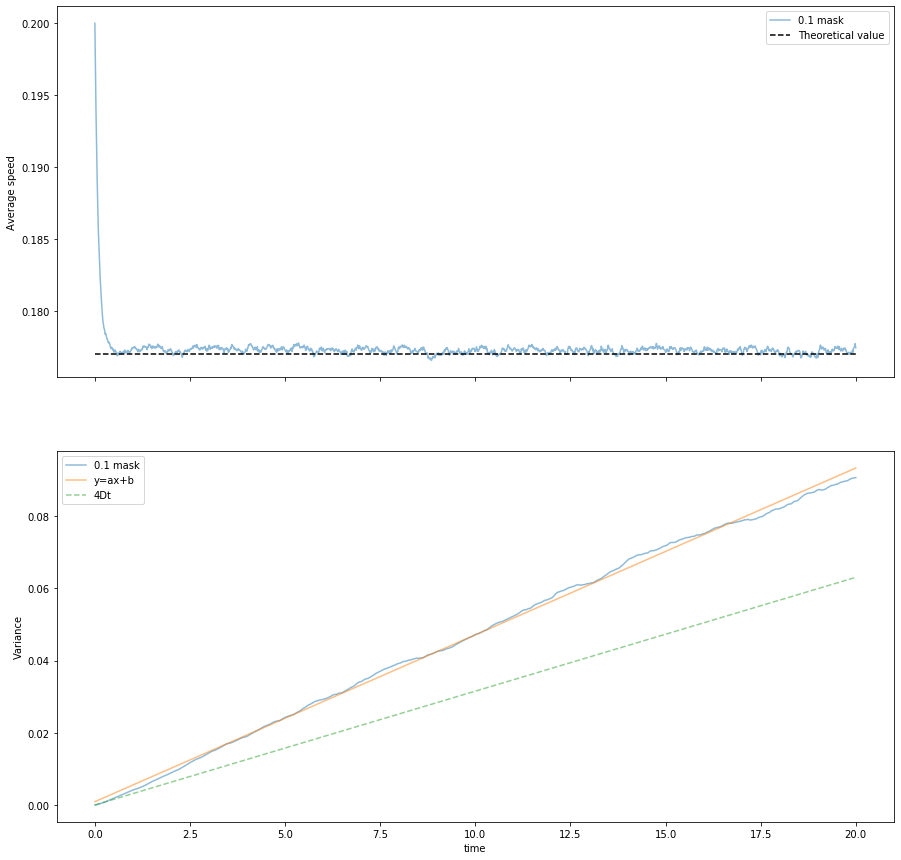

In [7]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(15,15))
axes[0].plot(time_array, mean_q_dist_matrix[:, 1], alpha=0.5, label='0.1 mask')
axes[0].plot([time_array[0], time_array[-1]], [avg_speed, avg_speed], 'k--', label='Theoretical value')
axes[0].legend()
axes[0].set_ylabel('Average speed')
axes[1].plot(time_array, mean_q_dist_matrix[:, 0], alpha=0.5, label='0.1 mask')
axes[1].plot(times, times*slope+intercept, alpha=0.5, label='y=ax+b')
axes[1].plot(times, times*4*D, '--', alpha=0.5, label='4Dt')
axes[1].set_xlabel('time')
axes[1].set_ylabel('Variance')
axes[1].legend()
# plt.savefig(os.path.join(plots_folder, f"variance_diff_masks.pdf"))
plt.show()

In [16]:
a = slope/4
np.abs(a-D)/a

0.3469191383317226

## Fit msd function

In [58]:
mean_q_dist_matrix = np.load(file=os.path.join(results_folder, f"problem_6_N_{N}_mean_q_dist.npy"))
#mean_q_dist_matrix = np.load(file=os.path.join(results_folder, f"problem_6_N_{N}_mean_q_dist_long_time.npy"))
time_array = mean_q_dist_matrix[:, 2]
mean_q = mean_q_dist_matrix[:, 0]

In [59]:
popt, pcov = curve_fit(msd_function, time_array, mean_q)

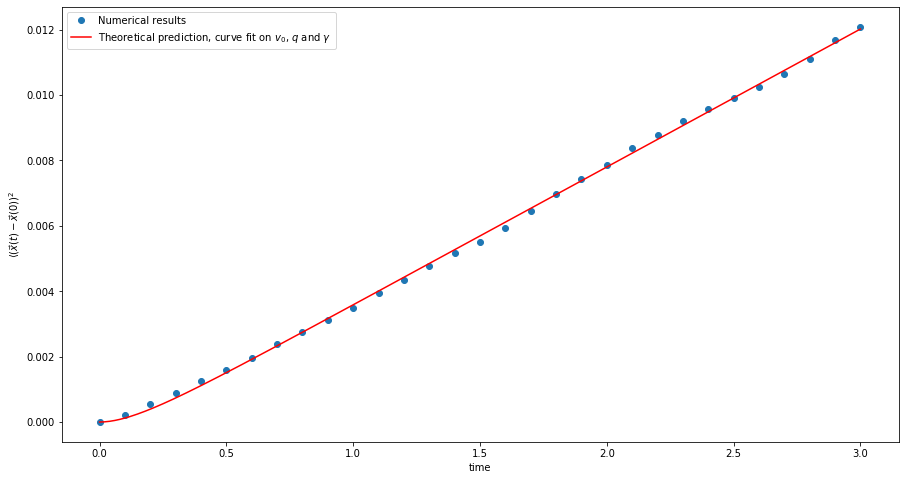

In [68]:
plt.figure(figsize=(15, 8))
plt.plot(time_array[::10], mean_q[::10], 'o', label='Numerical results')
plt.plot(time_array, msd_function(time_array, *popt), 'r-', label=r'Theoretical prediction, curve fit on $v_0$, $q$ and $\gamma$')
plt.xlabel('time')
plt.ylabel(r'$\langle(\vec{x}(t)-\vec{x}(0))^2$')
plt.legend()
plt.savefig(os.path.join(plots_folder, f"variance_versus_theory.png"))
plt.show()

In [62]:
popt

array([0.12498369, 0.0449849 , 4.61739969])